In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X, y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [4]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=123, n_estimators=10)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=123)

In [5]:
y_pred = regressor.predict([[7.5]])
y_pred

array([230000.])

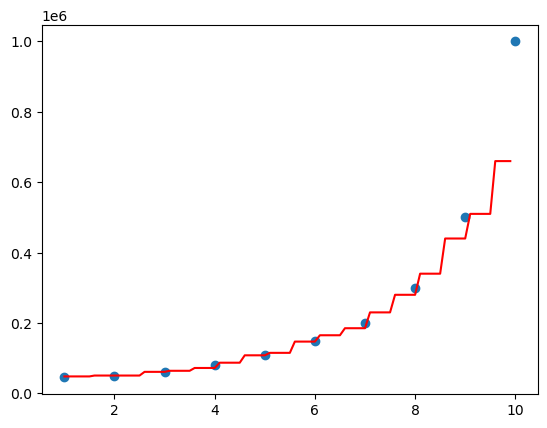

In [6]:
X_grid = np.arange(min(X.ravel()), max(X.ravel()), 0.1).reshape(-1, 1)
plt.scatter(X, y)
plt.plot(X_grid, regressor.predict(X_grid), color="red")
plt.show()

In [7]:
from sklearn.metrics import r2_score, mean_squared_error

print(f"R2 Score: {r2_score(y, regressor.predict(X))}")
print(f"MSE: {mean_squared_error(y, regressor.predict(X))}")

R2 Score: 0.8513403109881016
MSE: 11991225000.0


In [8]:
from sklearn.datasets import fetch_california_housing, load_diabetes

dataset = fetch_california_housing()
X = dataset.data
y = dataset.target

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
regressor = RandomForestRegressor(random_state=123, n_estimators=100)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [11]:
y_pred = regressor.predict(X_test)
y_pred

array([2.201    , 1.6538601, 1.03924  , ..., 1.37826  , 1.52544  ,
       2.35712  ])

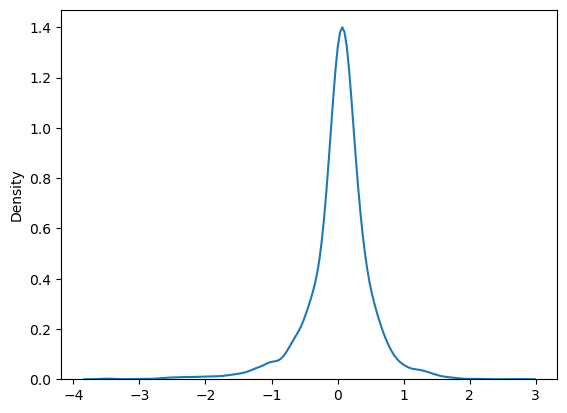

In [12]:
sns.kdeplot(y_pred-y_test)
plt.show()

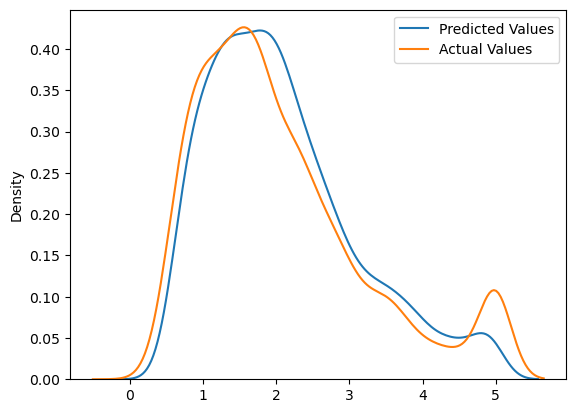

In [13]:
sns.kdeplot(y_pred, label="Predicted Values")
sns.kdeplot(y_test, label="Actual Values")
plt.legend()
plt.show()

In [14]:
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2 Score: 0.8162579685993
MSE: 0.2455787239094412


In [15]:
dataset = load_diabetes()
X = dataset.data
y = dataset.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
regressor = RandomForestRegressor(random_state=123, n_estimators=10)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=123)

In [18]:
y_pred = regressor.predict(X_test)
y_pred

array([148.3,  93. ,  90.9,  79.6, 209.3, 162.4, 187.3, 145.8, 175.9,
       177.3, 253.3, 134.5,  88. ,  74.7, 163.4, 159. , 263.3, 135.8,
        73.7, 188.6, 108.9,  91.5, 177.3, 269.1, 241.6, 267.4,  97. ,
       211.7, 231.5, 264. , 140.4, 162.4, 137.6, 251.3, 156.6, 250. ,
       226.9,  95.1, 181.3, 159.7, 245.7,  89.2, 249.1,  90.4, 230.8,
       292.9, 202.5, 158.9, 187.2, 122.6,  94.5, 113.8, 170.6,  53.9,
       118.1, 195.6, 182.3, 169. , 144.8, 115.8, 149.3, 167.1,  67.6,
       205.7, 208.4, 153.8,  87.7, 198.1,  89.7, 187.5,  98. , 215.8,
        64.4, 119.8, 128.2, 164.1, 133.9, 161.5, 218.7, 141. , 216.3,
        73. , 268.8,  82.7, 154.2, 129.9,  65.3,  85.9, 162.3])

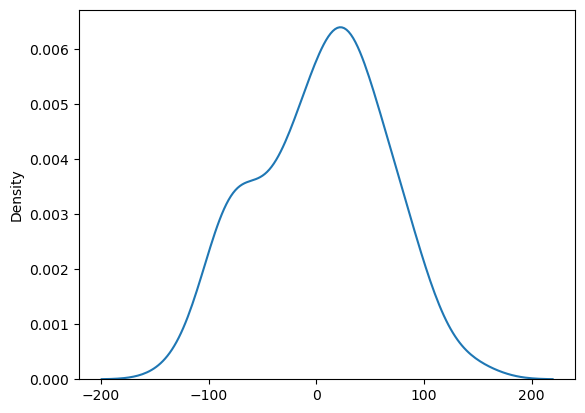

In [19]:
sns.kdeplot(y_pred-y_test)
plt.show()

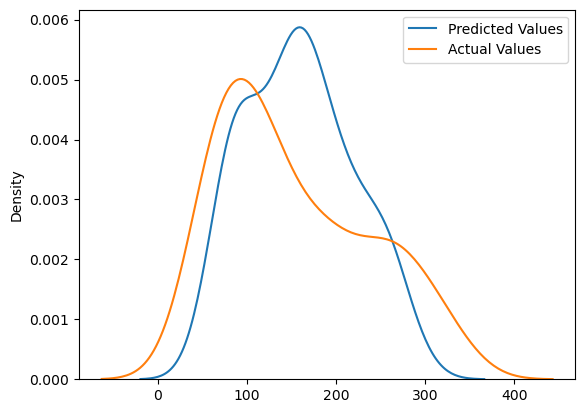

In [20]:
sns.kdeplot(y_pred, label="Predicted Values")
sns.kdeplot(y_test, label="Actual Values")
plt.legend()
plt.show()

In [21]:
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2 Score: 0.4991389123635016
MSE: 3436.4804494382015
